<a href="https://colab.research.google.com/github/Akihiko0123/programs/blob/master/machine_learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
DATA_PATH = '/content/drive/My Drive/Colab Notebooks/data/'
from google.colab import drive
drive.mount('/content/drive')
from tensorflow import keras
from sklearn.datasets import load_boston

#交差検証のパッケージ
from sklearn import model_selection

#回帰分析関係のパッケージ
from sklearn import linear_model #回帰分析
from sklearn.metrics import mean_squared_error #MSE

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["MEDV"]=boston.target
boston_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
r=boston_df.corr()
r.round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


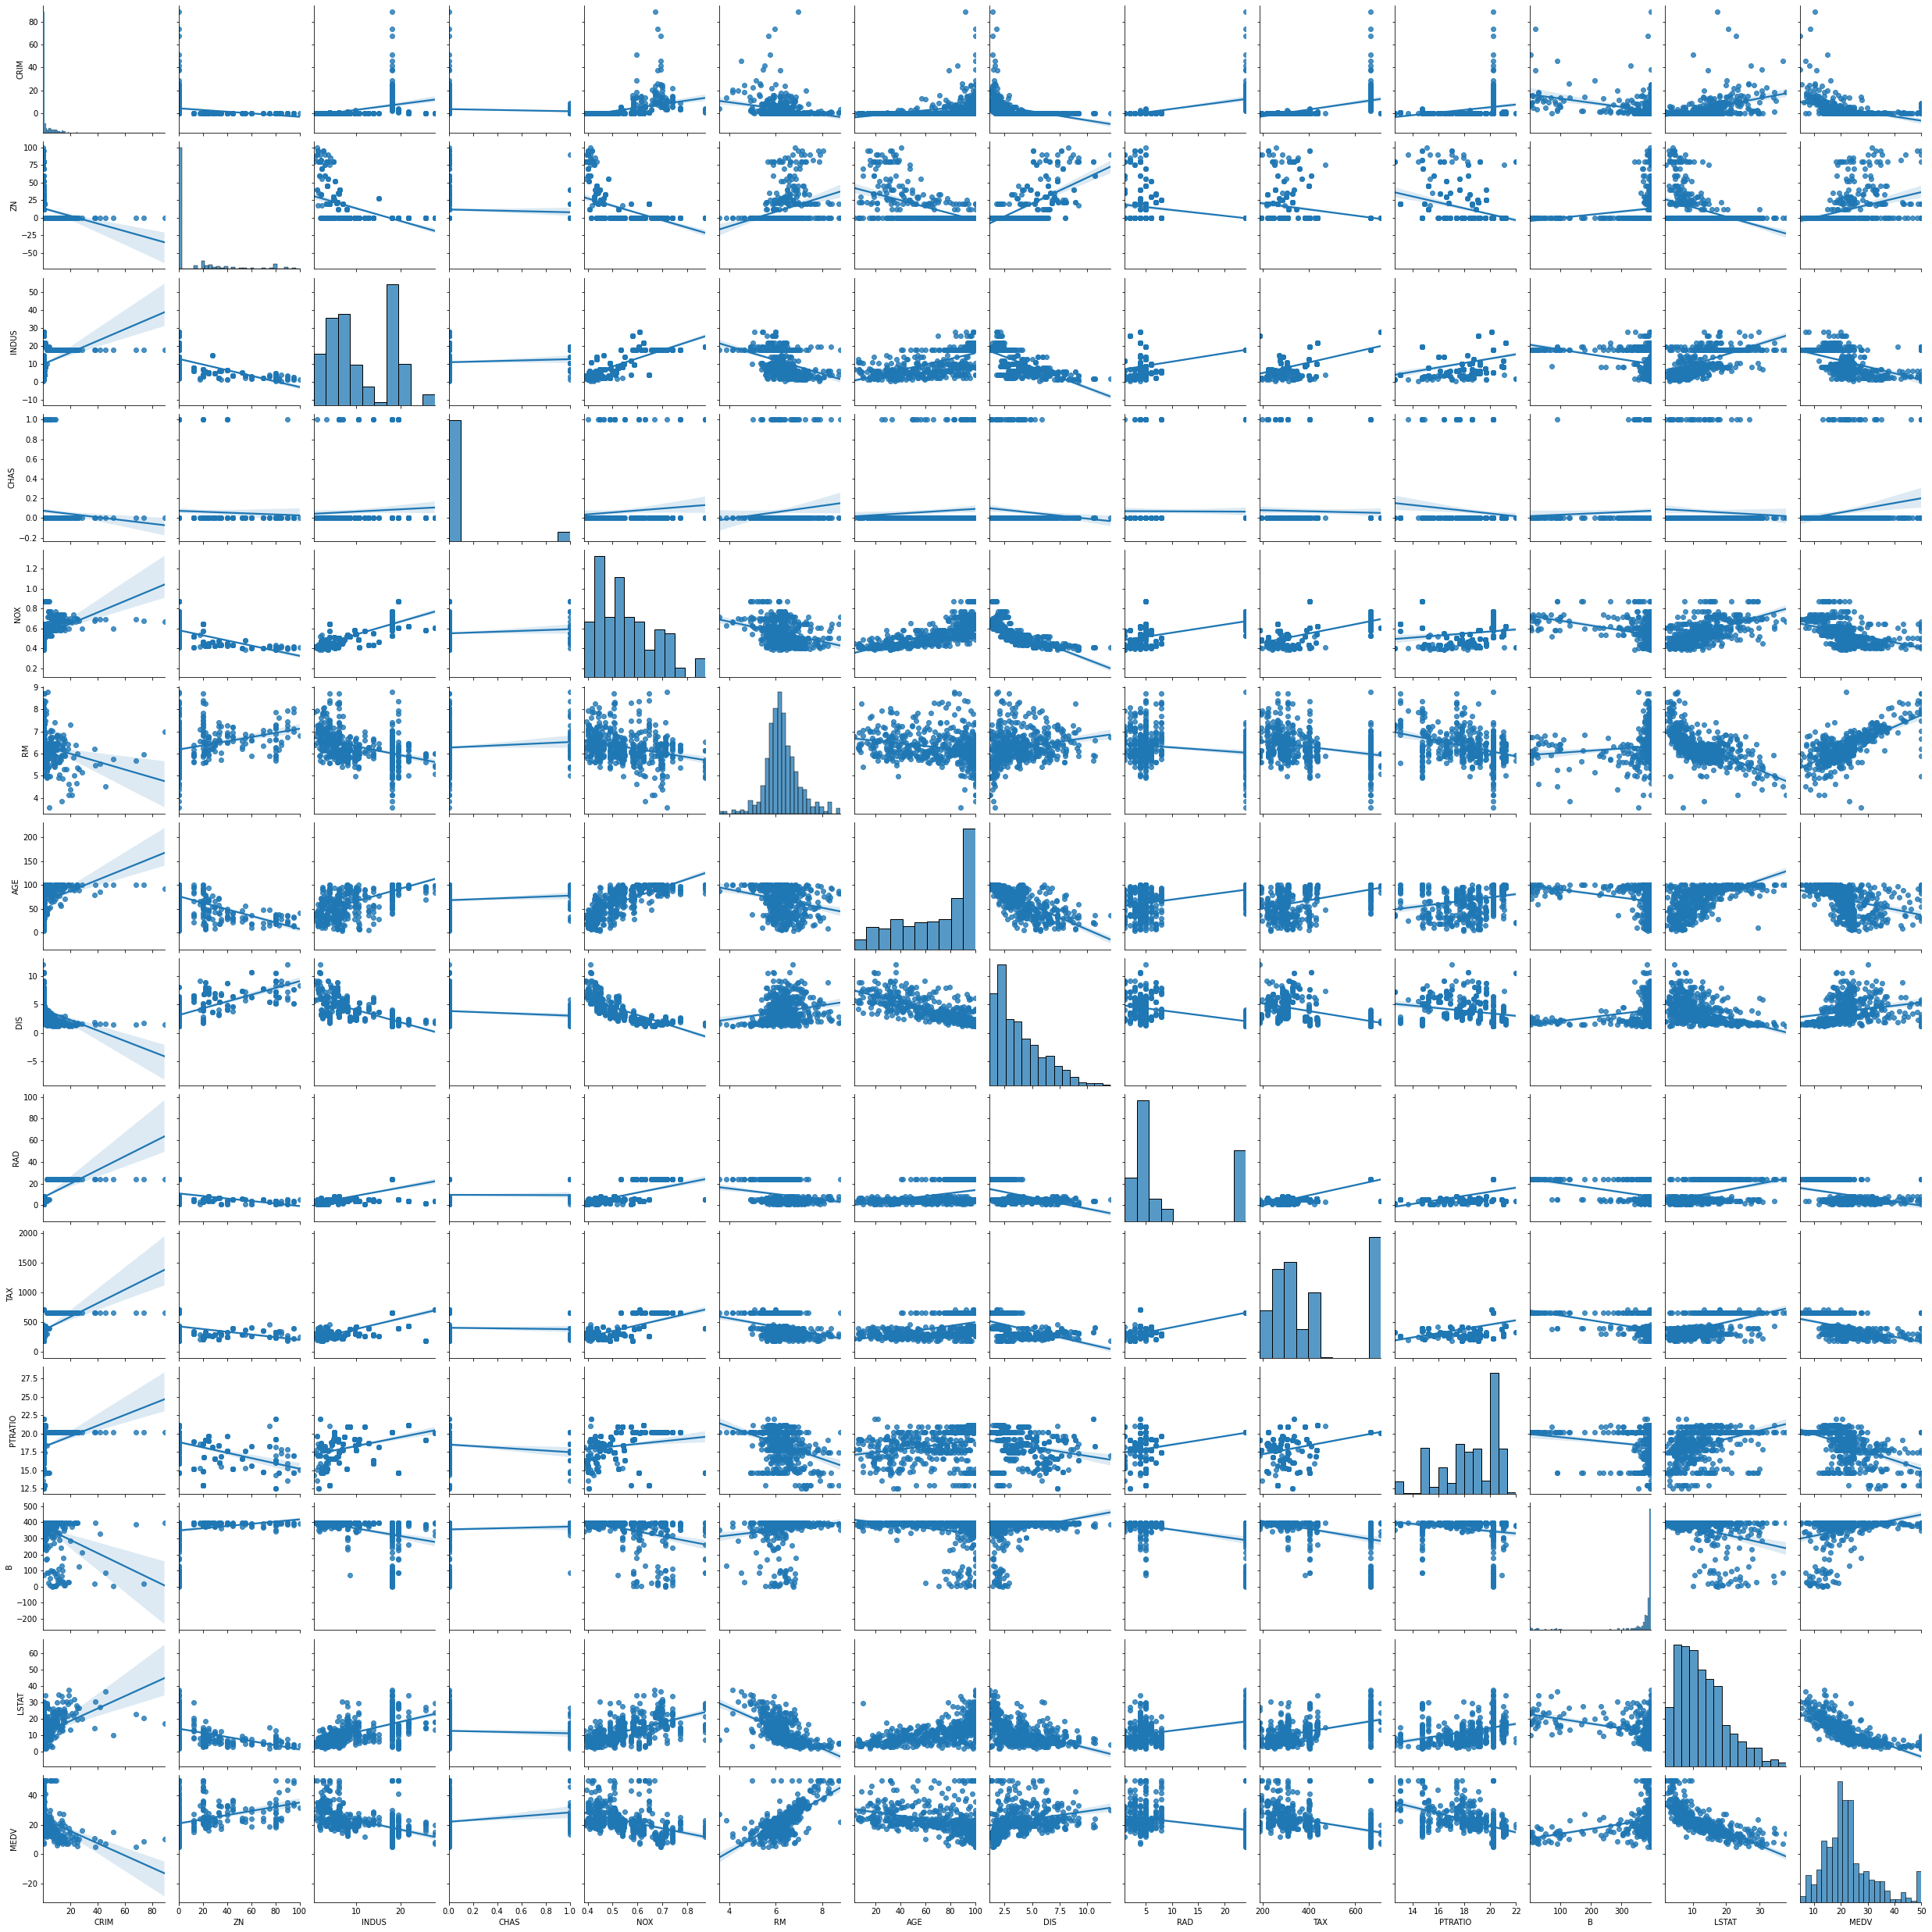

In [ ]:
sns.pairplot(boston_df, kind='reg')  # 散布図行列(回帰線表示)
plt.show()

In [ ]:
r[["MEDV"]].sort_values("MEDV")[:-1].round(1).T

,LSTAT,PTRATIO,INDUS,TAX,NOX,CRIM,RAD,AGE,CHAS,DIS,B,ZN,RM
MEDV,-0.7,-0.5,-0.5,-0.5,-0.4,-0.4,-0.4,-0.4,0.2,0.2,0.3,0.4,0.7


In [ ]:
from sklearn import linear_model
linear_model.LinearRegression(
    fit_intercept=True, #切片を計算するかどうか
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r[["RAD"]].sort_values("RAD")[:-1].round(1).T

,DIS,B,MEDV,ZN,RM,CHAS,AGE,PTRATIO,LSTAT,INDUS,NOX,CRIM,TAX
RAD,-0.5,-0.4,-0.4,-0.3,-0.2,-0.0,0.5,0.5,0.5,0.6,0.6,0.6,0.9


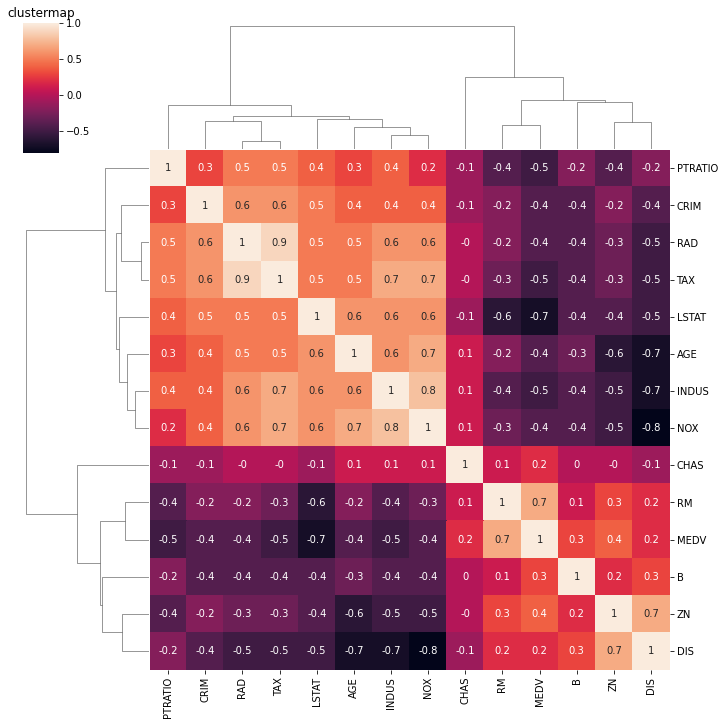

In [ ]:
sns.clustermap(r.round(1),annot=True)
plt.title('clustermap')
plt.show()

In [ ]:
r=boston_df.drop("RAD",axis=1)
r.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996,0.249929
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044,-0.507787


In [ ]:
x = r.loc[:,['RM']] #説明変数
x.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [ ]:
y = r['MEDV'] #目的変数
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
#データ分割(学習データ70%, 検証データ30%)
train_x, test_x, train_y, test_y = model_selection.train_test_split(x,y,test_size=0.3,random_state=0)
train_x.shape,test_x.shape,train_y.shape, test_y.shape

((354, 1), (152, 1), (354,), (152,))

In [ ]:
model=linear_model.LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#学習データによる学習
model.fit(train_x,train_y) #学習

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#学習データによる予測
train_pred = model.predict(train_x) #予測
pd.DataFrame(train_pred).head()

,0
0,10.739207
1,24.883114
2,22.992914
3,23.086028
4,19.510478


In [ ]:
#検証データによる予測
test_pred = model.predict(test_x) #予測
pd.DataFrame(test_pred).head()

,0
0,22.974292
1,21.884866
2,23.346745
3,13.811945
4,22.033848


In [ ]:
evaluation = pd.DataFrame(index=['傾き','切片','決定係数',"RMSE"])

train_rmse= np.sqrt(mean_squared_error(train_y,train_pred))
test_rmse=np.sqrt(mean_squared_error(test_y,test_pred))

evaluation['単回帰分析(学習データ)'] = [
    str(model.coef_.round(2)), #傾き(回帰係数)
    model.intercept_, #切片
    model.score(train_x,train_y),
    train_rmse
]
evaluation['単回帰分析(検証データ)'] = [
      '<-','<-',model.score(test_x,test_y),
      test_rmse,
]
evaluation

,単回帰分析(学習データ),単回帰分析(検証データ)
傾き,[9.31],<-
切片,-35.9943,<-
決定係数,0.50265,0.435144
RMSE,6.49289,6.85806


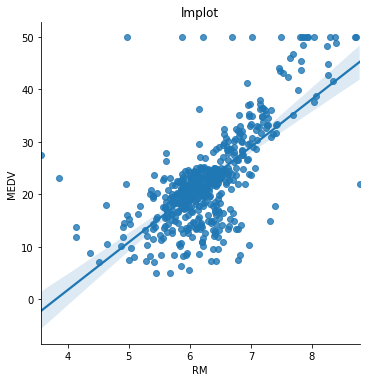

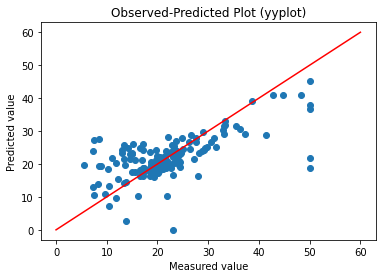

In [ ]:
# 回帰線
sns.lmplot(x='RM'
           , y="MEDV"
           , data=boston_df
           , ci=95 #　X軸の信頼区間(%)
           )
plt.title('lmplot')
plt.show()

# 観測予測プロット
fig, ax = plt.subplots()
ax.plot(test_y, test_pred, 'o') # Observed-Predicted Plot
ax.set_title('Observed-Predicted Plot (yyplot)')
ax.set_xlabel('Measured value')
ax.set_ylabel('Predicted value')
ax.plot([0,60],[0,60],color="red") #45度線
plt.show()

In [ ]:
test_x = np.arange(6.0,7.2,0.1).reshape(-1,1) # 2次元にする
test_x

array([[6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2]])

In [ ]:
# 予測
test_pred = model.predict(test_x)
pd.DataFrame({'test_x':test_x.ravel(), '予測値': test_pred}).round(1)

,test_x,予測値
0,6.0,19.9
1,6.1,20.8
2,6.2,21.7
3,6.3,22.7
4,6.4,23.6
5,6.5,24.5
6,6.6,25.5
7,6.7,26.4
8,6.8,27.3
9,6.9,28.3


In [ ]:
EXPLANATORY_VARIABLES = ['RM','LSTAT','PTRATIO','INDUS']
EXPLANATORY_VARIABLES

['RM', 'LSTAT', 'PTRATIO', 'INDUS']

In [ ]:
boston_df[EXPLANATORY_VARIABLES].corr()

,RM,LSTAT,PTRATIO,INDUS
RM,1.000000,-0.613808,-0.355501,-0.391676
LSTAT,-0.613808,1.000000,0.374044,0.603800
PTRATIO,-0.355501,0.374044,1.000000,0.383248
INDUS,-0.391676,0.603800,0.383248,1.000000


In [ ]:
x = boston_df.loc[:,EXPLANATORY_VARIABLES] #説明変数
y = boston_df['MEDV'] #目的変数

# データ分割(学習データ70%, 検証データ30%)
train_x, test_x, train_y, test_y = model_selection.train_test_split(x,y,test_size=0.3,random_state=0)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((354, 4), (152, 4), (354,), (152,))

In [ ]:
model.fit(train_x,train_y) #学習

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
train_pred = model.predict(train_x) # 学習データによる予測
test_pred = model.predict(test_x) # 検証データによる予測

In [ ]:
train_rmse = np.sqrt(mean_squared_error(train_y,train_pred))
test_rmse = np.sqrt(mean_squared_error(test_y,test_pred))

evaluation['重回帰分析(学習データ)'] = [str(model.coef_.round(2)),model.intercept_,model.score(train_x,train_y),train_rmse]
evaluation['重回帰分析(検証データ)'] = ['<-','<-',model.score(test_x,test_y),test_rmse]
evaluation

,単回帰分析(学習データ),単回帰分析(検証データ),重回帰分析(学習データ),重回帰分析(検証データ)
傾き,[9.31],<-,[ 4.45 -0.55 -1.1 -0.02],<-
切片,-35.9943,<-,22.0359,<-
決定係数,0.50265,0.435144,0.709784,0.597495
RMSE,6.49289,6.85806,4.95984,5.7892


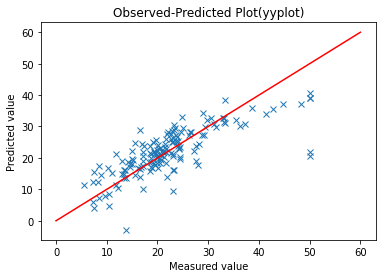

In [ ]:
fig, ax = plt.subplots()

# 観測予測プロット(yyplot)
ax.plot(test_y, test_pred, 'x')
ax.set_title('Observed-Predicted Plot(yyplot)')
ax.set_xlabel('Measured value')
ax.set_ylabel('Predicted value')
ax.plot([0,60],[0,60],color="red") #45度線

plt.show()